Arewa Data Science Academy
Deep Learning Cohort1.0
Name: Aminu Ukasha Aliyu
Email: aminu.ukashaaliyu@gmail.com
Title: Week 2 Solution

In [1]:
import torch

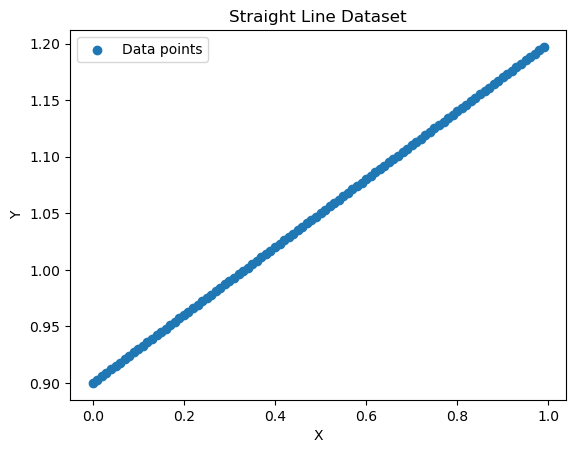

In [17]:
#question 1
import torch
import matplotlib.pyplot as plt

# Define parameters for the straight-line function
weight = 0.3
bias = 0.9
num_data_points = 100

# Create range values
start = 0
end = 1
step = 0.01

# Create X and y (features and labels)
X = torch.arange(start, end, step).unsqueeze(dim=1)

# Compute the corresponding Y values using the linear regression formula (weight * X + bias)
y = weight * X + bias

# Visualize the dataset
plt.scatter(X.numpy(), Y.numpy(), label="Data points")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Straight Line Dataset")
plt.legend()
plt.show()


In [13]:
len(X)

100

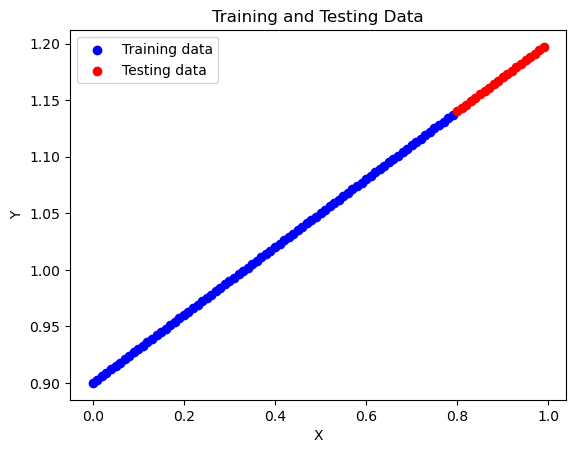

In [21]:
#question 1
from sklearn.model_selection import train_test_split

# Split data
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

# Visualize the training and testing data
plt.scatter(X_train.numpy(), y_train.numpy(), label="Training data", color="blue")
plt.scatter(X_test.numpy(), y_test.numpy(), label="Testing data", color="red")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Training and Testing Data")
plt.legend()
plt.show()


In [23]:
#question 2
import torch.nn as nn

class LinearRegressionModel(nn.Module):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        # Initialize parameters for weight and bias
        self.weight = nn.Parameter(torch.randn(1, dtype=torch.float32), requires_grad=True)
        self.bias = nn.Parameter(torch.randn(1, dtype=torch.float32), requires_grad=True)
    
    def forward(self, X):
        # Implement the forward pass (linear regression function)
        return self.weight * X + self.bias

# Instantiate the model
model = LinearRegressionModel()

# Check the state_dict of the model (parameters)
print(model.state_dict())


OrderedDict({'weight': tensor([-0.7573]), 'bias': tensor([0.1666])})


In [25]:
#question 3
# Loss function: L1 Loss (Mean Absolute Error)
loss_fn = nn.L1Loss()

# Optimizer: Stochastic Gradient Descent (SGD)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)


In [51]:
#question 3
torch.manual_seed(42)

# Set the number of epochs 
epochs = 300

for epoch in range(epochs):
    ### Training
    model.train() # train mode is on by default after construction

    # 1. Forward pass
    y_pred = model(X_train)

    # 2. Calculate loss
    loss = loss_fn(y_pred, y_train)

    # 3. Zero grad optimizer
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Step the optimizer
    optimizer.step()

    ### Testing
    model.eval() # put the model in evaluation mode for testing (inference)
    # 1. Forward pass
    with torch.inference_mode():
        test_pred = model(X_test)
    
        # 2. Calculate the loss
        test_loss = loss_fn(test_pred, y_test)

    if epoch % 20 == 0:
        print(f"Epoch: {epoch} | Train loss: {loss} | Test loss: {test_loss}")

Epoch: 0 | Train loss: 0.008736995980143547 | Test loss: 0.0013061284553259611
Epoch: 20 | Train loss: 0.008736995980143547 | Test loss: 0.0013061284553259611
Epoch: 40 | Train loss: 0.008736995980143547 | Test loss: 0.0013061284553259611
Epoch: 60 | Train loss: 0.008736995980143547 | Test loss: 0.0013061284553259611
Epoch: 80 | Train loss: 0.008736995980143547 | Test loss: 0.0013061284553259611
Epoch: 100 | Train loss: 0.008736995980143547 | Test loss: 0.0013061284553259611
Epoch: 120 | Train loss: 0.008736995980143547 | Test loss: 0.0013061284553259611
Epoch: 140 | Train loss: 0.008736995980143547 | Test loss: 0.0013061284553259611
Epoch: 160 | Train loss: 0.008736995980143547 | Test loss: 0.0013061284553259611
Epoch: 180 | Train loss: 0.008736995980143547 | Test loss: 0.0013061284553259611
Epoch: 200 | Train loss: 0.008736995980143547 | Test loss: 0.0013061284553259611
Epoch: 220 | Train loss: 0.008736995980143547 | Test loss: 0.0013061284553259611
Epoch: 240 | Train loss: 0.0087369

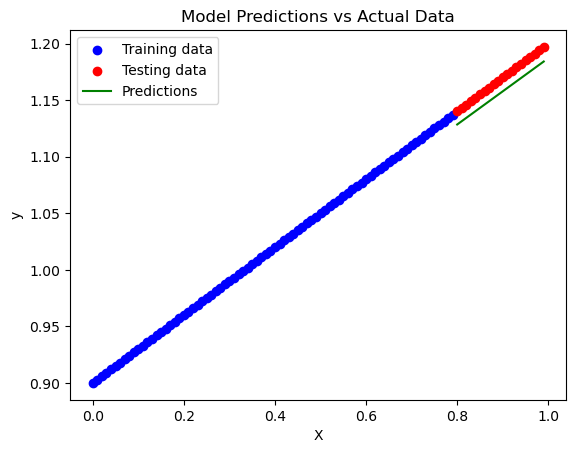

In [59]:
#question 4
model.eval()
with torch.no_grad():
    y_test_pred = model(X_test)

# Visualize the predictions against the original training and testing data
plt.scatter(X_train.numpy(), y_train.numpy(), label="Training data", color="blue")
plt.scatter(X_test.numpy(), y_test.numpy(), label="Testing data", color="red")
plt.plot(X_test.numpy(), y_test_pred.numpy(), label="Predictions", color="green")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Model Predictions vs Actual Data")
plt.legend()
plt.show()


In [61]:
#question 5
# Save the model's state_dict
torch.save(model.state_dict(), "linear_regression_model.pth")


In [67]:
#question 5
# Instantiate a fresh instance of LinearRegressionModelV2
loaded_model = LinearRegressionModel()

# Load model state dict 
loaded_model.load_state_dict(torch.load('linear_regression_model.pth'))

print(f"Loaded model:\n{loaded_model}")
print(f"Model on device:\n{next(loaded_model.parameters()).device}")


Loaded model:
LinearRegressionModel()
Model on device:
cpu


C:\Users\beela\AppData\Local\Temp\ipykernel_11548\284209224.py:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model.load_state_dict(torch.load('linear_regression_mo

In [73]:
#questio 5
# Evaluate loaded model
loaded_model.eval()
with torch.inference_mode():
    loaded_model_preds = loaded_model(X_test)
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])